In [1]:
import os
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

pd.set_option('max_columns', 330)
pd.set_option('max_rows', 1000)

In [2]:
%matplotlib inline
# plt.style.use('ggplot')

# Load DataFrames

In [3]:
input_path = r'C:\Users\Panagiotis.Mavritsak\Desktop\Ner thesis\\'
df = pd.read_excel(input_path+'data.xlsx', index_col=0)
df = df.resample('Y', label='right').mean()
df

,Aluminium (USD/tonne),Copper (USD/pound),Zinc (USD/tonne),Nickel (USD/MT),Lead (USD/tonne),Tin (USD/tonne),Silver (USD/ t oz),Gold (USD/ t oz),Crude Oil WTI (USD/ bbl),Crude oil Brent (USD/bbl),Natural gas (USD/Mmbtu),USD index,DJIA (USD),FTSE 100 (GBP),Hang seng (HKD),US libor
Date,,,,,,,,,,,,,,,,
1995-12-31,1803.253191,1.347391,1030.410213,8226.017021,630.271064,6221.629787,5.187817,384.486383,18.377489,16.953362,1.696877,84.162128,4504.266638,3358.233617,9019.027106,6.035745
1996-12-31,1505.236667,1.050023,1025.589375,7509.416667,775.896250,6160.287500,5.175533,387.849167,22.000625,20.314875,2.496950,87.214625,5736.347125,3827.537917,11465.951833,5.515833
1997-12-31,1599.890254,1.046021,1313.884407,6934.557415,623.893729,5642.412076,4.878746,331.411017,20.629237,19.328051,2.480504,96.180381,7436.301017,4688.889831,13369.921059,5.743008
1998-12-31,1357.379487,0.847887,1024.480556,4629.101923,528.874145,5550.354701,5.493261,294.045299,14.361368,13.307051,2.154919,98.725000,8640.719530,5637.620983,9419.999872,5.565726
1999-12-31,1360.449315,0.688763,1074.253196,6016.024886,501.876027,5417.911416,5.213804,279.622374,19.235068,17.958858,2.302425,99.901187,10460.643607,6284.833151,12669.192374,5.411507
2000-12-31,1550.484468,0.804457,1126.556638,8616.740000,454.208511,5429.081915,4.962396,278.798723,30.326681,28.490511,4.316191,109.643404,10723.887106,6374.900809,16081.890383,6.533319
2001-12-31,1446.409556,0.812531,887.364267,5979.200000,477.088667,4491.500000,4.353769,270.936000,25.910622,24.810622,4.034987,114.942311,10208.350089,5567.060444,12604.579022,3.782800
2002-12-31,1350.050429,0.696912,778.945494,6788.001288,451.918240,4061.191202,4.593348,310.411588,26.123433,25.073605,3.357197,111.010601,9201.704034,4581.929270,10438.914807,1.796567
2003-12-31,1434.249138,0.791125,830.076940,9678.981681,515.752155,4898.929957,4.896065,364.215517,31.082241,28.503750,5.499953,95.766207,9007.684483,4052.390517,10298.926466,1.215474


check if values are missing

In [4]:
df.isnull().sum()

Aluminium (USD/tonne)        0
Copper (USD/pound)           0
Zinc (USD/tonne)             0
Nickel (USD/MT)              0
Lead (USD/tonne)             0
Tin (USD/tonne)              0
Silver (USD/ t oz)           0
Gold (USD/ t oz)             0
Crude Oil WTI (USD/ bbl)     0
Crude oil Brent (USD/bbl)    0
Natural gas (USD/Mmbtu)      0
USD index                    0
DJIA (USD)                   0
 FTSE 100 (GBP)              0
Hang seng (HKD)              0
 US libor                    0
dtype: int64

### Plot distributions

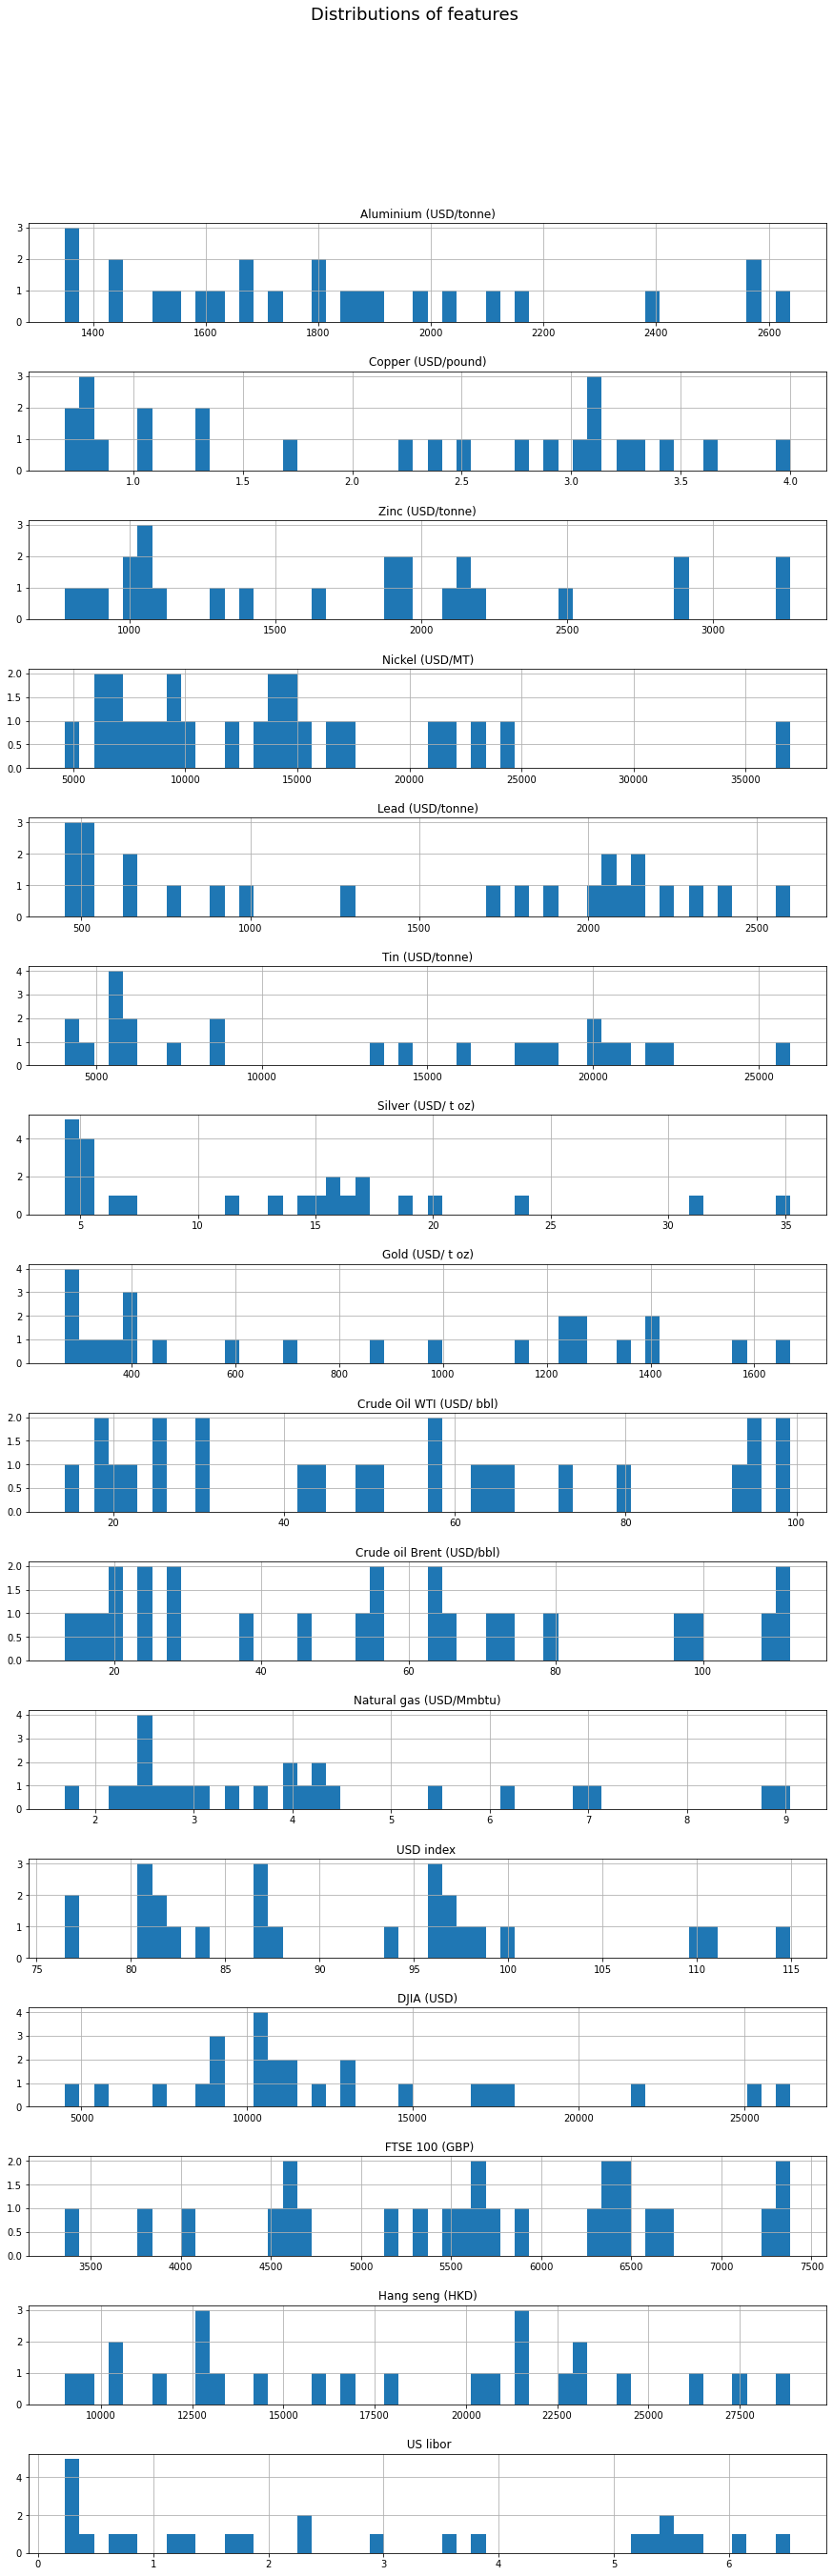

In [5]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    df[column].hist(ax=ax, bins=50)

    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Autocorrelation plots

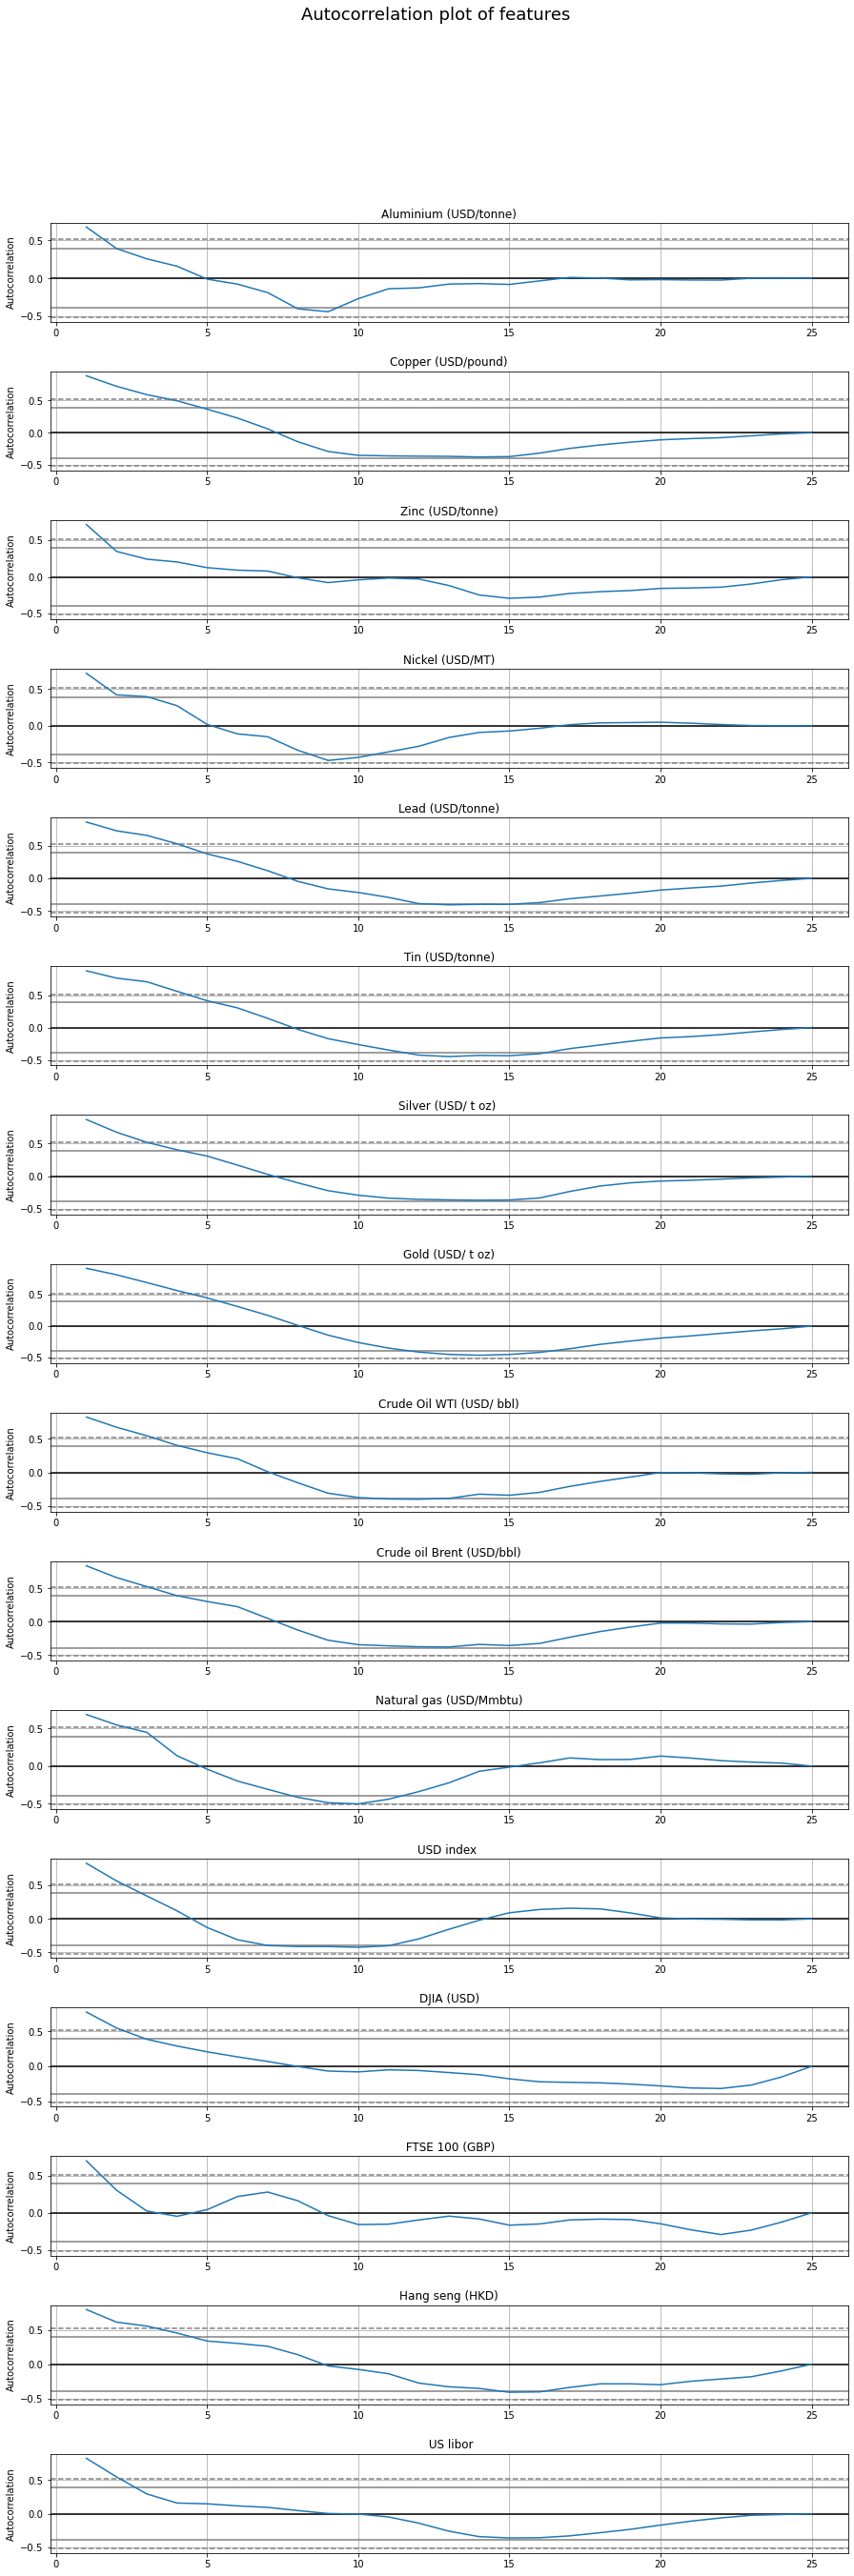

In [6]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Autocorrelation plot of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    pd.plotting.autocorrelation_plot(df[column], ax=ax)
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Time-series and correlation plots

Functions for anomalies and plotting

In [7]:
def calc_anom_df(df):
    '''Calculate daily anomolies based on average data throughout the full time series
    Returns: New pandas dataframe with anomoloies calculated for each variable
    '''
    anom_df = pd.DataFrame(data=df.index, columns=['Date'])
    anom_df.set_index('Date', inplace=True)
    var_list = list(df.columns)
    
    for var in var_list:
        anom_df[var] = df[var] - df.mean()[var]
    
    return(anom_df)

def var_plots(df, anomaly=False):
    '''Plot of volatility alongside with raw features
    Return: Time series plots of all variables
    '''
    if anomaly==True:
        title=f'Features ANOMALIES time-series'
    else:
        title=f'Features time-series'
        
    df.plot(subplots=True, figsize=(16,12), title=title)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
    plt.xlabel('Date', fontsize = 14)
    plt.grid()
    
    if anomaly==True:
        title=f'Correlation map on ANOMALIES'
    else:
        title=f'Correlation map'
    
    corrmat = df.corr()
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
    plt.title(title, fontsize=15)
    plt.show()

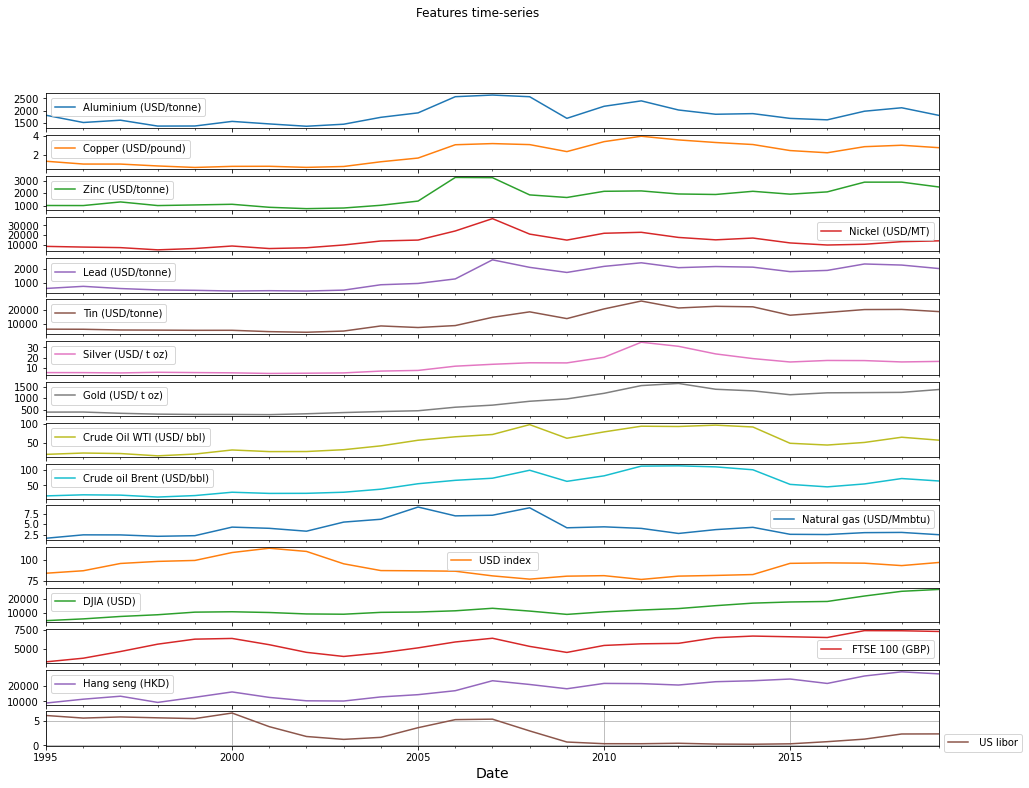

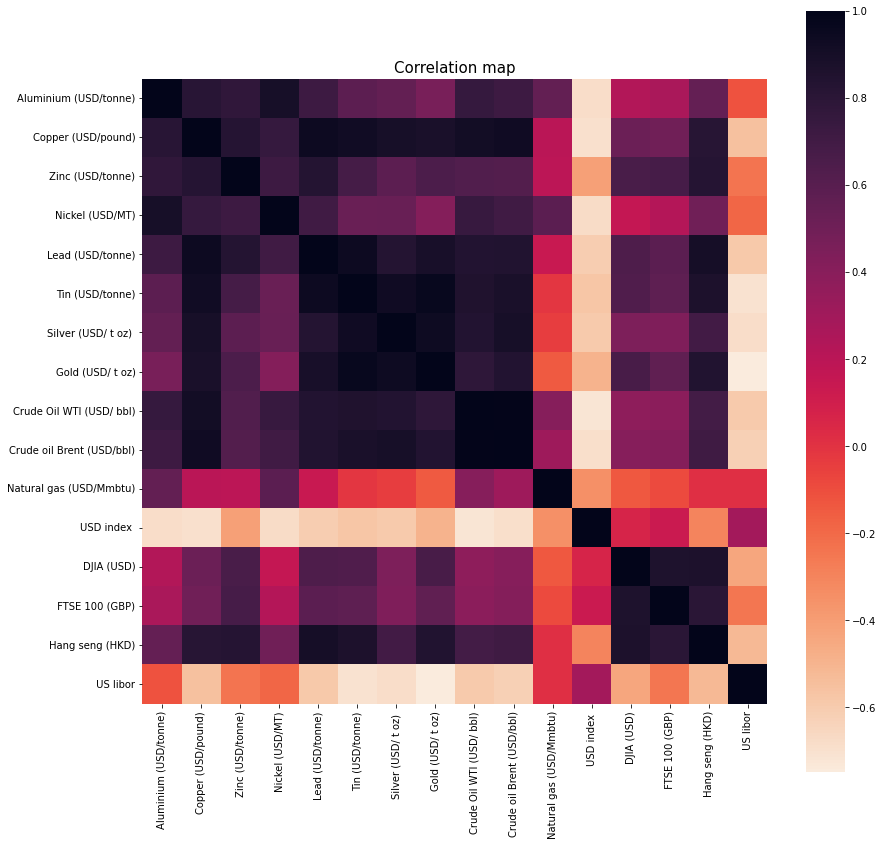

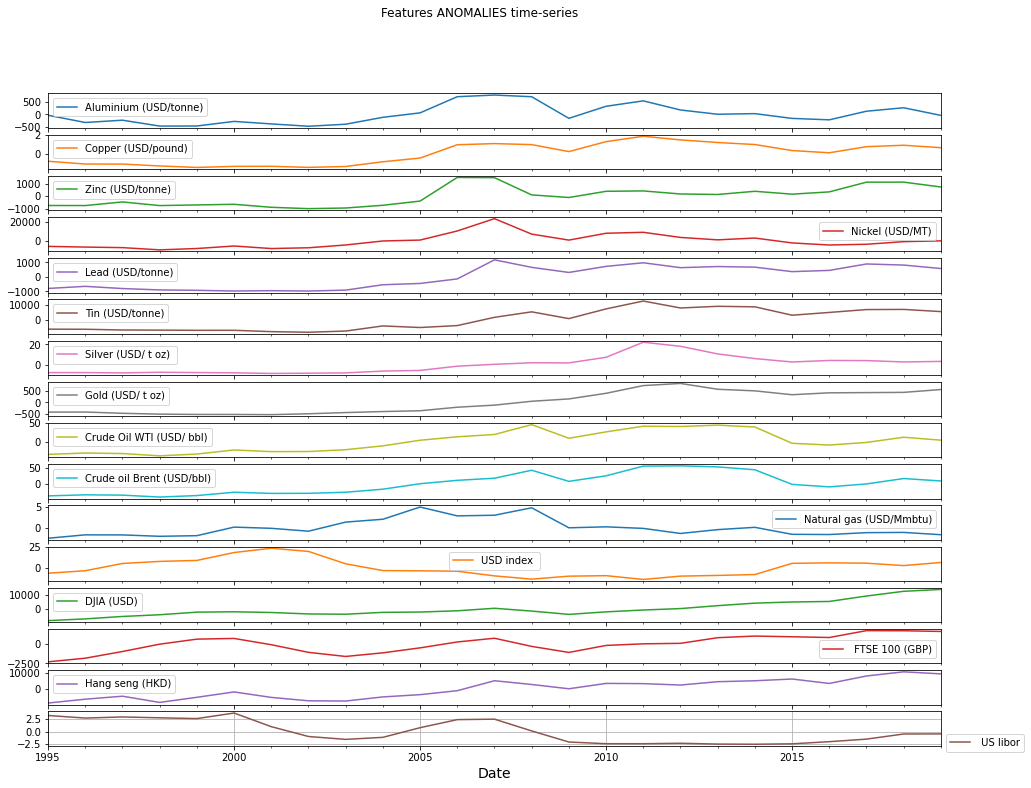

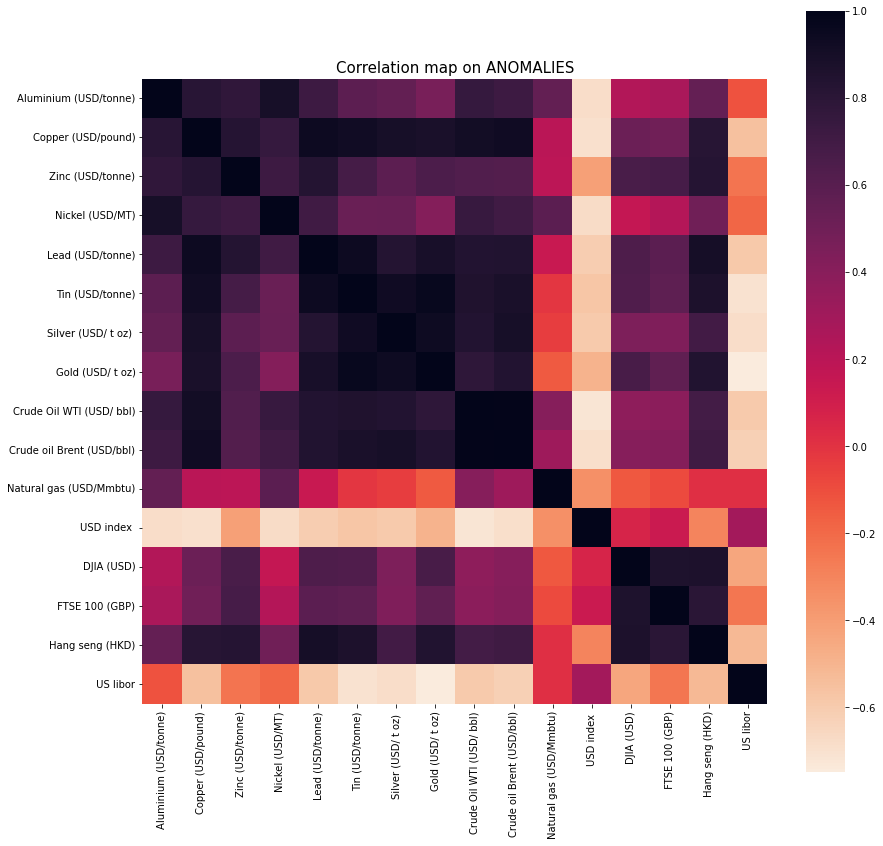

In [8]:
anom_df = calc_anom_df(df)

var_plots(df)
var_plots(anom_df, anomaly=True)